In [2]:
# !pip install keras

In [6]:
# !pip install tensorflow --user

  Using cached tensorflow-2.13.0-cp39-cp39-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.13.0-cp39-cp39-win_amd64.whl (276.5 MB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached numpy-1.24.3-cp39-cp39-win_amd64.whl (14.9 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorboard-2.13.0-py3-none-any.whl (5.6 MB)
  Using cached keras-2.13.1-py3-none-any.whl (1.7 MB)
  Using cached google_auth_oauthlib-1.0.0-py2.py3-none-any.whl (18 kB)
  Using cached google_auth-2.23.0-py2.py3-none-any.whl (181 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Using cached oauthlib-3.2.2-py3-none-any.whl (151 kB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
google-api-core 1.25.1 requires google-auth<2.0dev,>=1.21.1, but you have google-auth 2.23.0 which is incompatible.
google-cloud-core 1.7.1 requires google-auth<2.0dev,>=1.24.0, but you have google-auth 2.23.0 which is incompatible.
google-cloud-storage 1.31.0 requires google-auth<2.0dev,>=1.11

In [1]:
import keras
keras.__version__

'2.13.1'

In [2]:
import tensorflow
tensorflow.__version__

'2.13.0'

In [3]:
keras.backend.backend()

'tensorflow'

In [4]:
import matplotlib.pyplot as plt

from keras.datasets import mnist
import numpy as np

(X_train,y_train),(X_test,y_test) = mnist.load_data()

print (X_train.shape, X_test.shape)
print (y_train.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,)


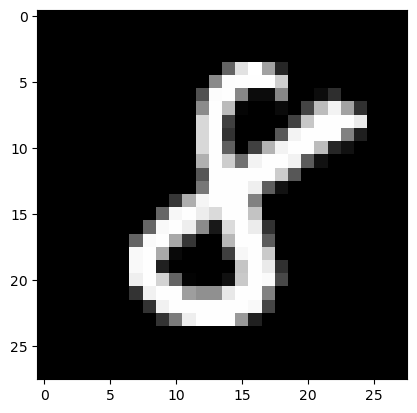

In [5]:
ind = np.random.randint(0,X_train.shape[0])
plt.imshow(X_train[ind],cmap='gray')

In [6]:
X_train.min()

0

In [7]:
def reformat (x3_matrix):
    Qv = x3_matrix.shape[0]
    Qx = x3_matrix.shape[1]
    Qy = x3_matrix.shape[2]
    x = np.zeros((Qv,Qx*Qy))
    for i in range(0,Qv):
        cnt=0
        for j in range(0,Qx):
            for k in range(0,Qy):
                x[i][cnt]=x3_matrix[i][j][k]
                cnt=cnt+1
    print ("  --> Scaled shape: ",x.shape)
    return x

In [8]:
#X_train = reformat(X_train)
#X_test = reformat(X_test)

X_train = X_train.reshape((-1,28*28))
X_test = X_test.reshape((-1,28*28))
print (X_train.shape, X_test.shape)
print (y_train.shape)

(60000, 784) (10000, 784)
(60000,)


In [9]:
X_train = X_train/255.0
X_test = X_test/255.0
print ("Max tr. = ",X_train.max(),"Min = ",X_train.min())
print ("Max ts. = ",X_test.max(),"Min = ",X_test.min())

Max tr. =  1.0 Min =  0.0
Max ts. =  1.0 Min =  0.0


In [10]:
from keras.layers import Dense       # Fully coupled linear layer
from keras.models import Sequential  # The sequential layers frame

model = Sequential()
# ----number of N --------------Qp x Qv-----------f(x)--------
model.add(Dense(64, input_shape=(784,),activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

# sigmoid,tanh,relu,leaky relu, maxout, elu

model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
#!pip install pydot

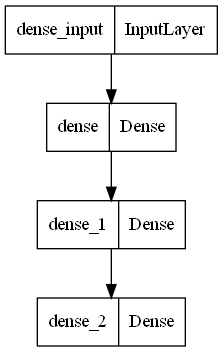

In [12]:
from tensorflow.keras.utils import plot_model

plot_model(model)

In [13]:
# Config determines the NN constitution
config = model.get_config()
config

{'name': 'sequential',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_input'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 784),
    'units': 64,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'registered_name': None,
   'build_config': {'in

In [14]:
model = model.from_config(config)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model.compile(loss='categorical_crossentropy',optimizer='SGD', metrics=['accuracy'])
# loss - defines the NN error function
# optimizer - defines the algorithm used to recalculate the new params values
# metrics - defines the algorithm of defining the NN learning complete

In [16]:
#!pip install np_utils

In [17]:
from tensorflow.keras.utils import to_categorical

y_train_labels = y_train
y_train = to_categorical(y_train)

y_test_labels = y_test
y_test = to_categorical(y_test)


In [18]:
# epochs - the number of steps of all used dataset
# batch_size - the number of epoch sub iterations or subdivisions
# verbose - verbosing the most critical data
# validation data - all validated data

In [19]:
history = model.fit(X_train,y_train,epochs=5,batch_size=256,verbose=1,validation_data=(X_test,y_test))

Epoch 1/5
235/235 [==============================] - 3s 5ms/step - loss: 1.8315 - accuracy: 0.4695 - val_loss: 1.2241 - val_accuracy: 0.7542
Epoch 2/5
235/235 [==============================] - 1s 4ms/step - loss: 0.9097 - accuracy: 0.7921 - val_loss: 0.6696 - val_accuracy: 0.8312
Epoch 3/5
235/235 [==============================] - 1s 5ms/step - loss: 0.6021 - accuracy: 0.8402 - val_loss: 0.5116 - val_accuracy: 0.8605
Epoch 4/5
235/235 [==============================] - 1s 4ms/step - loss: 0.4924 - accuracy: 0.8623 - val_loss: 0.4412 - val_accuracy: 0.8769
Epoch 5/5
235/235 [==============================] - 1s 3ms/step - loss: 0.4361 - accuracy: 0.8764 - val_loss: 0.3994 - val_accuracy: 0.8869


In [20]:
history = model.fit(X_train,y_train,epochs=5,batch_size=1000,verbose=1,validation_split=0.2)

Epoch 1/5
48/48 [==============================] - 1s 11ms/step - loss: 0.4177 - accuracy: 0.8808 - val_loss: 0.3839 - val_accuracy: 0.8913
Epoch 2/5
48/48 [==============================] - 0s 9ms/step - loss: 0.4109 - accuracy: 0.8827 - val_loss: 0.3782 - val_accuracy: 0.8932
Epoch 3/5
48/48 [==============================] - 0s 9ms/step - loss: 0.4047 - accuracy: 0.8847 - val_loss: 0.3731 - val_accuracy: 0.8942
Epoch 4/5
48/48 [==============================] - 0s 9ms/step - loss: 0.3988 - accuracy: 0.8861 - val_loss: 0.3683 - val_accuracy: 0.8947
Epoch 5/5
48/48 [==============================] - 0s 9ms/step - loss: 0.3934 - accuracy: 0.8877 - val_loss: 0.3637 - val_accuracy: 0.8965


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


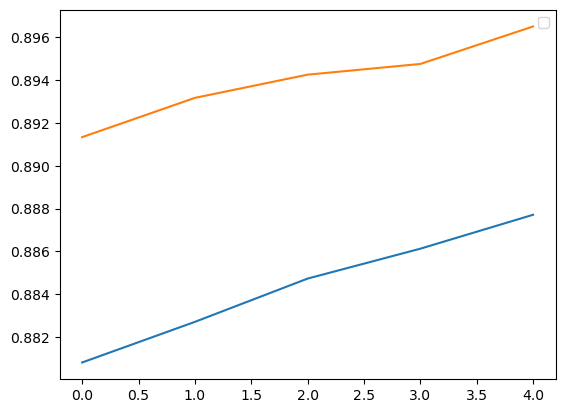

In [21]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(train_acc)
plt.plot(val_acc)
plt.legend()

In [22]:
# when the train curve crosses the blue then the optimized value was found !!!!

In [23]:
loss,metric = model.evaluate(X_test,y_test,batch_size=128)
loss,metric

79/79 [==============================] - 0s 2ms/step - loss: 0.3706 - accuracy: 0.8952


(0.3705665171146393, 0.8952000141143799)

In [24]:
predictions = model.predict(X_test[0][None]) # None is set specially
predictions

1/1 [==============================] - 0s 216ms/step


array([[0.7277812 , 0.11218537, 0.48124087, 0.7766695 , 0.16217563,
        0.05595292, 0.02694725, 0.99948245, 0.52821505, 0.9495939 ]],
      dtype=float32)

In [25]:
model.save_weights('model_weights.h5')
model.save('model.h5')

C:\Users\Alex\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [26]:
from keras.models import load_model
#from keras.models import load_weights

#model = load_weights('model_weights.h5')
model = load_model('model.h5').summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
# Optimization:
# 1. Momentum - the previous correction step is summarized with current
# 2. AdaGrad - the difference of step value which depends from the step number
# 3. Leaky adaGrad
# 4. Adam

In [41]:
import tensorflow as tf
tf.random.set_seed(1)

model = Sequential()
model.add(Dense(64,activation='relu',input_shape=(784,)))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='sigmoid'))
model.save_weights('model_weights.h5')

1) Застревание в локальных минимумах и седловых точках. Седло не так страшно, а вот минимум по локальный это проблема.(минимумы и максимумы)
2) Множество локальных максимумов и минимумов, по которым производная обнуляется а из-за резкой границы перепада ландшафта. Преодолеть такой выступ становится невозможно. (резкие границы ландшафта)
3) По первому и второму пунктам существует проблема нулевой производной

